In [2]:
import wandb

api = wandb.Api()

run = api.run("broccoliman/tinylinguist/b7q6uon2")

In [4]:
hist = run.history()

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper", style="whitegrid", palette="Dark2")

In [8]:
hist

,_step,train/epoch,train/grad_norm,train/train_runtime,eval/steps_per_second,train/global_step,eval/loss,train/learning_rate,eval/samples_per_second,_runtime,train/loss,train/train_steps_per_second,_timestamp,train/total_flos,train/train_samples_per_second,train/train_loss,eval/runtime
0,1,0.00,1.652381,NaN,NaN,10,NaN,1.000000e-04,NaN,751.295153,10.7352,NaN,1.710205e+09,NaN,NaN,NaN,NaN
1,7,0.03,1.209565,NaN,NaN,70,NaN,7.000000e-04,NaN,824.955197,6.8903,NaN,1.710205e+09,NaN,NaN,NaN,NaN
2,8,0.03,1.095129,NaN,NaN,80,NaN,8.000000e-04,NaN,836.554482,6.1369,NaN,1.710205e+09,NaN,NaN,NaN,NaN
3,9,0.03,1.074378,NaN,NaN,90,NaN,9.000000e-04,NaN,846.853076,5.5442,NaN,1.710205e+09,NaN,NaN,NaN,NaN
4,10,0.04,0.814471,NaN,NaN,100,NaN,1.000000e-03,NaN,855.569735,4.9534,NaN,1.710205e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1387,4.98,0.387463,NaN,NaN,13210,NaN,5.293223e-08,NaN,18440.199772,1.2679,NaN,1.710223e+09,NaN,NaN,NaN,NaN
496,1390,4.99,0.324005,NaN,NaN,13240,NaN,1.367066e-08,NaN,18480.025540,1.4097,NaN,1.710223e+09,NaN,NaN,NaN,NaN
497,1391,4.99,0.308030,NaN,NaN,13250,NaN,6.273442e-09,NaN,18491.280721,1.3204,NaN,1.710223e+09,NaN,NaN,NaN,NaN
498,1392,5.00,0.384661,NaN,NaN,13260,NaN,1.721287e-09,NaN,18501.217165,1.2670,NaN,1.710223e+09,NaN,NaN,NaN,NaN


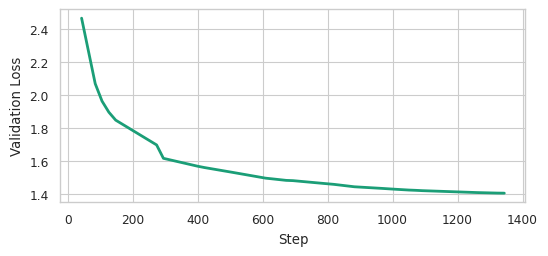

In [11]:
plt.figure(figsize=(6, 2.5))
sns.lineplot(data=hist, x="_step", y="eval/loss", linewidth=2)
plt.xlabel("Step")
plt.ylabel("Validation Loss")
plt.savefig("img/loss.pdf", bbox_inches="tight")

In [12]:
import json
import os

path = "/proj/mechanistic.shadow/mrofin/tinylinguist/models/"

texts = []

dirs = os.listdir(path)
for model_dir in dirs:
    if model_dir.startswith("checkpoint"):
        with open(os.path.join(path, model_dir, "generation_results.json")) as f:
            cur_texts = json.load(f)
            cur_texts["step"] = int(model_dir.split("-")[1])
            texts.append(cur_texts)

In [15]:
texts = sorted(texts, key=lambda x: x["step"])

In [17]:
texts[0]["golden"][0]

'Once upon a time, there was a friendly cat named Tom. Tom loved to play with his toy cable. One sunny day, Tom went outside to play with his cable in the garden.\nWhile playing, Tom saw a little bird named Sally. Sally was sad because her toy was stuck in a tree. Tom wanted'

In [25]:
texts[1]["generated"][0]

"Once upon a time, there was a friendly cat named Tom. Tom loved to play with his toy cable. One sunny day, Tom went outside to play with his friends.\nOne day, Tom's friend, Tom,, came to play with the ball. The ball played with his friends and had fun. They"

In [32]:
for i in range(5):
    print(texts[i]["generated"][0][80:])
    print(texts[i]["step"])

 toy cable. One sunny day, Tom went outside to play withijarict detached eluc Shield Park Follow PRFakeFake cratezens consentpoints Ebija Profit onstage frequ twitter pepper Mysterious Tue gif pepper sake frequ Rayzeesigglegmail pac
0
 toy cable. One sunny day, Tom went outside to play with his friends.
One day, Tom's friend, Tom,, came to play with the ball. The ball played with his friends and had fun. They
200
 toy cable. One sunny day, Tom went outside to play with his friends.
Tom saw a big tree. He wanted to play with the sack. So, he showed the sack to his friends. They all wanted to
400
 toy cable. One sunny day, Tom went outside to play with his friends.
In the park, Tom saw a big, red ball. He wanted to play with it. So, Tom played with the ball and ran
600
 toy cable. One sunny day, Tom went outside to play with his friends.
While they were playing, a big dog came to the park. The dog had a big hat and a soft pillow. Tom and the dog
800
